# <center>MSDS 7333 - Quantifying the World</center>
## <center>Case Study 10</center>


<center> <b>Asha Saxena, John Heinen, Hari Narayan Sanadhya</b> </center>
<center>October 8, 2018</center>
<br>

## 1. Introduction

Emails are the major source of communication in today's day and age and emails are used heavily for personal and professional usage. Health of our email communication is determined by identifying spam and cleaning our system from spam mails. Spam (Junk mail) is a major challenge and in this case study we deal with identifying spam from ham.

Junk emails are referred as Spam. They are unsolicited messages sent in bulk by email and hence also called Unsolicited Bulk Email (UBE). Most email spam messages are commercial in nature intended to get the recipient to buy some product or service. These emails are sub-categorized as unsolicited commercial email (UCE). Other spam categories could be email chain letters, personal campaign mailings, messages with virus-laden attachments, and messages containing virus hoaxes. 

The defining characteristics of spam emails are:
* It is sent as a mass mailing to huge numbers of recipients at a time.
* At least some of the intended recipients have not agreed to receive messages from the sender.

Email that is not spam is often called Ham. As of the most recently reported period (March 2018), spam messages accounted for 48.16 percent of e-mail traffic worldwide with most common types of spam e-mail as healthcare and dating spam. 

As a result of large share of spam in e-mail traffic, span detection methods and span filtering techniques were developed and with time, they are becoming more advanced and optimized. 

In this case study, we aim to showcase how to use the R-package rpart (Recursive Partitioning and Regression Trees) to help with email classification as spam or ham. We tweaked with the rpart tunning parameters to fine-tuned and optimize the algorithm in order to improve prediction effectiveness.

## 2. Background

In the mid-1990's when commercial use of the internet first became possible and with that, marketers and publicists began to test electronic mail as an accessible means of communication. As email became more and more accessible, same was its usage as an excellent advertising tool. Capability of softwares to send emails automatically to thousands of people at a time very soon made email spam, a problem which was ubiquitous, unavoidable and repetitive. It caused significant productivity loss to employees and an added expense to security and network bandwidth.

Blogs, chat groups and instant messages are now used as a supplement to emails but emails are still the most popular mode of communication for both commercial and business use. So the need for reliable anti-spam filters remains high.

At this time, there are many spam filters that have been designed using machine learning supervised classification methods like NaiveBayes and decision trees (Random Forest). 

R's Rpart package provides an implementation of non-parametric classification and regression trees (CART). Its tree based model which helps us explore the structure of a set of data, while developing easy to visualize decision rules for predicting a categorical (classification tree) or continuous (regression tree) outcome. This approach in data mining is also termed as Recursive partitioning. 

Our approach is to use this package for the purpose of email classification as spam or ham. Model performance tuning for efficiency improvement is our leader towards success which will be measured in terms of how accurate we are in filtering of the emails.

## 3. Method
In this case study, we use the SpamAssassin data provided in the textbook. The data is available at the link http://www.rdatasciencecases.org/Spam/SpamAssassinMessages.zip.

This zip file contains email data in 5 different folders which are named as easy_ham, easy_ham_2, hard_ham, spam and spam_2. These folder names contains the pre-classified emails. The folder name is indication of whether email is spam or ham. There are total of 9348 emails provided, of which 2397 are spam and 6951 as ham. 

The emails are structured as plain text file with content mostly in form of key value pair. Header contains path information that the email followed from source to destination and body contains message information like when was the email send, who is the sender, who is the receiver, subject of the email, attachments information, body of the email and much more. 

Using the contents of the emails, a dataframe was created with total 30 variables of which one variable is the response variable for the classification problem and rest 29 are explanatory variables. Below table shows the description of each of the column of the data frame created.


<table>
  <caption style="font-size:20px; text-align:center;">Table 1: Data variables description</caption>
  <tr>
    <th>Column Name</th>
    <th>Data Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>isSpam</td>
    <td>logical (Response Variable)</td>
    <td>True if message is Spam and False if message is ham</td>
  </tr>
  <tr>
    <td>isRe</td>
    <td>logical</td>
    <td>If there is any content in In-Reply-To field. i.e. the message has ever been replied back</td>
  </tr>
  <tr>
    <td>numLines</td>
    <td>integer</td>
    <td>Number of lines in message</td>
  </tr>
  <tr>
    <td>bodyCharCt</td>
    <td>integer</td>
    <td>Number of characters in message body</td>
  </tr>
  <tr>
    <td>underscore</td>
    <td>logical</td>
    <td>Reply-To field has an underscore in it along with at least on alphanumeric character</td>
  </tr>
  <tr>
    <td>subExcCt</td>
    <td>integer</td>
    <td>Number of ! In the subject line</td>
  </tr>
  <tr>
    <td>subQuesCt</td>
    <td>integer</td>
    <td>Number of ? In the subject line</td>
  </tr>
  <tr>
    <td>numAtt</td>
    <td>numeric</td>
    <td>Number of attachments in the message</td>
  </tr>
  <tr>
    <td>priority</td>
    <td>logical</td>
    <td>If message is send with high priority</td>
  </tr>
  <tr>
    <td>numRec</td>
    <td>integer</td>
    <td>Number of recipients of the message</td>
  </tr>
  <tr>
    <td>perCaps</td>
    <td>numeric</td>
    <td>Percentage of capital letters in message body</td>
  </tr>
  <tr>
    <td>isInReplyTo</td>
    <td>logical</td>
    <td>In-Reply-To field present or not</td>
  </tr>
  <tr>
    <td>sortedRec</td>
    <td>logical</td>
    <td>Check if recipients are listed in sorted order</td>
  </tr>
  <tr>
    <td>subPunc</td>
    <td>logical</td>
    <td>Check if subject contains any Punctuation characters apart from '/.:@-</td>
  </tr>
  <tr>
    <td>hour</td>
    <td>numeric</td>
    <td>Hour of the day when the email was sent</td>
  </tr>
  <tr>
    <td>multipartText</td>
    <td>logical</td>
    <td>Message can be of html|plain|text, check if message is having multiple parts</td>
  </tr>
  <tr>
    <td>hasImages</td>
    <td>logical</td>
    <td>Check if the message has images</td>
  </tr>
  <tr>
    <td>isPGPsigned</td>
    <td>logical</td>
    <td>Check if message attachment encrypted using PGP</td>
  </tr>
  <tr>
    <td>perHTML</td>
    <td>numeric</td>
    <td>Percentage of HTML content of the total characters in message header</td>
  </tr>
  <tr>
    <td>subSpamWords</td>
    <td>logical</td>
    <td>Check if subject included spam words.</td>
  </tr>
  <tr>
    <td>subBlanks</td>
    <td>numeric</td>
    <td>Percentage of blanks in the subject line</td>
  </tr>
  <tr>
    <td>noHost</td>
    <td>logical</td>
    <td>Check if the host of the message is present or not (Message-* field in the header i.e. the field can be Message-ID, Message-id, message-Id)</td>
  </tr>
  <tr>
    <td>numEnd</td>
    <td>logical</td>
    <td>Check if message is from a login that ends with a number</td>
  </tr>
  <tr>
    <td>isYelling</td>
    <td>logical</td>
    <td>Check if the subject line states that the sender is yelling – all alphabets capital case</td>
  </tr>
  <tr>
    <td>forwards</td>
    <td>numeric</td>
    <td>Check if email is a forwarded message or not.</td>
  </tr>
  <tr>
    <td>isOrigMsg</td>
    <td>logical</td>
    <td>Check if there is any line containing “original message” in it</td>
  </tr>
  <tr>
    <td>isDear</td>
    <td>logical</td>
    <td>Check if body contains dear sir or dear madam string</td>
  </tr>
  <tr>
    <td>isWrote</td>
    <td>logical</td>
    <td>check if message body contains any of the words wrote, schrieb, ecrit or escribe</td>
  </tr>
  <tr>
    <td>avgWordLen</td>
    <td>numeric</td>
    <td>For every non-blank line in the body, what is the average word length</td>
  </tr>
  <tr>
    <td>numDlr</td>
    <td>integer</td>
    <td>Number of $ signs in the message</td>
  </tr>
</table>

### 3.1 Exploratory Data Analysis
<p style="font-size:16px">
<figure>
    <img src="CorrelationPlt.jpeg"  style="width:80%">
    <figcaption style="font-size:20px; text-align:center;">Figure 1 - Correlation Plot between data variables</figcaption>
</figure>
<br>In Figure 1. Correlation Plot, we are looking to analysis the strength of the relation between the variables and the direction of the relationship. No causation is defined here. 

Some of the examples of strong correlations observed includes:-
* positive correlation between BodyCharCt and numLines field.
* positive correlation between IsInReplyto and IsRe field.
* positive correlation between forwards and IsRe field.
* negative correlation between IsRe and isSpam field. 
* negative correlation between isWrote and IsSpam field.

Fields like hour, avgWordLen and numDlr have almost zero correlation with the response variable isSpam. If the classification model used for prediction were linear, then these features could have been removed from the input to the model. But all models that were used for email caterization as spam or ham are non-linear models, the results from correlation plot were not used as correlation is a linear characterstic. <br><br>

<figure>
    <img src="SPAM_LLR_Boxplot.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 2 - Boxplot showing LLR distribution for Spam/Ham Mails</figcaption>
</figure>
<br>In Figure 2, As we review the box plot for spam and ham to test the data set based on the log likelihood ratio, which expresses how likely the data belongs to one category than other. Positive value of log likelhood ratio mean indicates message being spam and negative value indicates message being ham. That that reason, that the spam boxplot is in the positive range and ham boxplot is in the negative range. This likelyhood is computed using the words present in the body of the email after removing the stopwords. <br><br>

<figure>
    <img src="SPAM_LLR_LinePlotTypeI+IIErrors.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 3 - Line Plot of Type I and Type II error using LLR for SPAM/HAM Classification</figcaption>
</figure>
<br>In Figure 3, We are evaluating the Type I and Type II errors for Log Likelihood Ratio. Here Type I error (equivalent to false positives) classify Ham as Spam, the Type I error here is 0.01 whereas Type II error (equivalent to false negatives) here we classify Spam as Ham, the Type II erroe here is 0.02. The plot helps us understand that the value is lower for Type I error compared to Type II error. <br><br>


<figure>
    <img src="SPAM_ScatterPlotNumLinesNumChars.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 4 - Plot of # of Lines vrs # of Characters for each mail</figcaption>
</figure>In Figure 4, Number of lines in the email has direct relation (positive correlation) to the number of characters for each mail. This has a very logical and accurate assessment. The graph helps validate our pratical belief.<br><br>


<figure>
    <img src="SPAM_boxplotsPercentCaps.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 5 - Distirbution of perCaps variable via Box Plot</figcaption>
</figure>
<br>In Figure 5, The box plot helps identify the importance of number of capital letters in the email to classify email as spam or ham. The median and upper quartile is higher for spam, which indicates that spam contains higher percentage of capital letters in the message body than ham.   <br><br>


<figure>
    <img src="SPAM_qqplotPercentCapsTotChars.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 6 - QQ-plot showing perCaps for Spam and Ham emails </figcaption>
</figure>
<br>In Figure 6, Here QQ Plot is showing consistent result from the preious plots and graphs. QQ plot indicates the normality of a distribution. The above QQ plot shows that distribution of capital letters percentage for ham emails is right skewed when compared with the distribution of capital letters percentage for spam emails which means that higher the captial letters, higher is the chance of that email being a spam. <br><br>


<figure>
    <img src="SPAM_scatterplotPercentCapsTotChars.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 7 - Plot between percent Capital and Total Char variables </figcaption>
</figure>
<br>In Figure 7, we are looking at the scatter plot where green represents ham and purple represents spam. The scatter plot clearly indicates as the percentage capital letter increases, the density of spam emails increases. This has been consistent to our observaion in previous charts and graphs. But the same cannot be said that confidently for total character variables. It appears that as the total character variables in the email increases, there is a slightly  higher chance for the email to be a spam. <br><br>



### 3.2 Machine Learning Models and their outcomes

<b>Description of matrices used for machine learning model performance evaluation </b>
* <b>Sensitivity</b> - Same as Recall, this is an indicator of Type II, or False Negative errors.
* <b>Specificity</b> - This is a metric representing the True Negative rate.
* <b>Precision</b> - This is an indicator of Type I, or False Positive errors.
* <b>Recall</b> - Same as Sensitivity, this is an indicator of Type II, or False Negative errors.
* <b>F1</b> - Overall ratio of Precision and Recall.  We used this as an important indicator for determining the best model as discussed in the Hyperparameters section below.
* <b>Accuracy</b> - Overall ratio of correctly predicted observations to total observations.
* <b>Kappa</b> - Sometimes seen as a more robust metric to Accuracy as this metric not only takes in simple accuracy, but also takes into consideration observations predicted accurately by chance.


<b>Description of Hyperparameters tuned for the various machine learning models implemented </b>
When peforming a grid search to tune the parameters of all of our models, we used best (largest) F1 score to determine when the best model was found.  For each algorithm we will identify the parameters that we tunded below:

<b>Naivebayes</b> - information from http://uc-r.github.io/naive_bayes
* <b>fL</b> - allows us to incorporate the Laplace smoother.
* <b>usekernel</b> - parameter allows us to use a kernel density estimate for continuous variables versus a guassian density estimate
* <b>adjust</b> - allows us to adjust the bandwidth of the kernel density (larger numbers mean more flexible density estimate)

<b>Rpart</b> - information from http://www.learnbymarketing.com/tutorials/rpart-decision-trees-in-r/
* <b>cp</b> - The cp value is a stopping parameter. It helps speed up the search for splits because it can identify splits that don’t meet this criteria and prune them before going too far. In other words, it specifies how the cost of a tree is penalized by the number of terminal nodes, resulting in a regularized cost. Small cp value results in larger trees and potential overfitting, large cp values in small trees and potential underfitting.

<b>Random Forest</b> - information from https://machinelearningmastery.com/tune-machine-learning-algorithms-in-r/
* <b>mtry</b> - Number of variables randomly sampled as candidates at each split.

<b>xgboost</b> - information from https://insightr.wordpress.com/2018/05/17/tuning-xgboost-in-r-part-i/
* <b>max_depth</b> - Controls the maximum depth of the trees.
* <b>eta</b> - Learning (or shrinkage) parameter. It controls how much information from a new tree will be used in the Boosting.
* <b>gamma</b> - Controls the minimum reduction in the loss function required to grow a new node in a tree.
* <b>colsample_bytree</b> - Re-samples the variables in each new tree instead of each new node.

<figure>
    <img src="SPAM_rpartTree.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 8 - Decision tree generated using rpart</figcaption>
</figure>
<br>In Figure 8, we see the graphical representaion of decision tree created by the rpart model trained using the email data. Each node represents a split creteria and based on whether it comes out to be true or false, downstream movement towards left or right is decided. The leaf node of the tree shows how many entries ended up following that path and of those how many were true (spam) and how many were false (ham). <br><br>


<figure>
    <img src="SPAM_rpartTypeIandII.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 9 - Rpart Type I and Type II error plots</figcaption>
</figure>
<br>Figure 9 shows the result of the rpart model parameter tunning. Its a plot of Type I and Type II error w.r.t. the cp parameter values. The optimal value of cp comes out to be around 0.001 where the type I error is around 3.4% and type II error is around 13%.<br><br>


<figure>
    <img src="cm_nb.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 10 - Confusion Matrix from naivebayes algorithm</figcaption>
</figure>
<br>Figure 10 provides the results of the naivebayes algorithm after hyperparameter optimization has been performed. The model is having a decent performance - 90% accuracy 95% precision and 91.6% recall. As we can see, Specificity and Kappa look like there could be room for improvement.  We will also see if F1 improves in other models.<br><br>


<figure>
    <img src="cm_rpart.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 11 - Confusion Matrix from rpart algorithm</figcaption>
</figure>
<br>Figure 11 provides the results of the final rpart algorithm obtained after hyperparameter tunning. The Rpart model performed slightly better across all metrics, with a 10% improvement on Kappa and around 4% in accuracy over the naivebayes model.<br><br>



<figure>
    <img src="cm_rf.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 12 - Confusion Matrix from random forest algorithm</figcaption>
</figure>
<br>Figure 12 provides the results from the hyperparameter optimized random forest algorithm. The Random Forest model shows significant improvement over the naivebayes and rpart models.  There is another 10% gain in Kappa.  Specificity is near 95% and all other metrics are above 98%.<br><br>


<figure>
    <img src="cm_xgb.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 13 - Confusion Matrix from xgboost algorithm</figcaption>
</figure>
<br>Figure 13 provides the results from the xgboost algorithm after hyperparamter tunning. The results from the xgboost algorithm are very similar to the Random Forest model, outperforming the naivebayes and rpart models. <br><br>


<figure>
    <img src="featureImp_rpart.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 14 - Feature Importance from rpart algorithm</figcaption>
</figure>
<br>Figure 14 shows the top 15 features for the rpart model. The top four features are perCaps, bodyCharCt, numLines, and perHTML, with perCaps as the most important feature contributing around 20% to the model predictability.<br><br>


<figure>
    <img src="featureImp_rf.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 15 - Feature Importance from random forest algorithm</figcaption>
</figure>
<br>Figure 15 shows the top 15 features for the random forest model.  The top four features matches the rpart model's top features, with perCaps being the most important feature. <br><br>


<figure>
    <img src="featureImp_xgb.jpeg">
    <figcaption style="font-size:20px; text-align:center;">Figure 16 - Feature Importance from xgboost algorithm</figcaption>
</figure>
<br>Figure 16 shows the top 15 features for the xgboost model. Forwards moves into the top four for xgboost, knocking down numLines, however perCaps is still the king of features by far in the xgboost model as well.<br><br>

## Results 
Spam detection classification problem was worked on in this case study using the algorithms naivebayes, rpart, random forest and xgboost. All models peformed well, with accuracies and F1 scores in the 90%'s. Random forest and xgboost tool an edge over naivebayes and rpart which is because both of them are ensemble algorithms. 

Looking into the results further, the Kappa, or accuracy score that takes accuracy by chance into consideration was a concern for the naivebayes model at about 75%.  There was an improvement to 85% for Kappa when running the rpart model, however when running the random forest and xgboost models, the Kappa score improved to over 94% for each.  There were also increases across the other metrics as well for these two models.  Random forest yielded the highest numbers in all categories except for F1 score, where xgboost beat random forest by just .2%.  Although random forest yielded the highest results, the differences may not be statistically significant and more analysis is required to determine which of the two models would be the best to use.

For rpart, the hyperparameter that was tuned was cp with the optimal value of 0.001. Other parameters that controls the various aspects of rpart fit includes minsplit, maxdepth, usesurrogate, maxsurrogate etc can further be tunned to improve the performance of the model. 

Similarily for other models, not all hyperparameters were optimized. We only optimized some important parameters. For xgboost, we tunned max_depth, eta, gamma and colsample_bytree parameters only, There are other parameters like min_child_weight , monotone_constraints etc which can be tunned. But since using the default values of those parameters, the model obtained had a great outcome, we didn't optimized it.

## Conclusions and Future Work
In conclusion, we found that the random forest and xgboost models performed the best on the data we trained and tested for email classification into ham and spam. Using cross validation, we ensured that while optimizing, the model is effectively generalizing. 

As a next step, we could apply these models to newer datasets or as we receive new emails to monitor their performance. Also if the model performance degrades, then choosing balanced dataset for training may be a good idea if we have sufficient data or apply other techniques to handle imbalanced datasets like upsampling and downsampling. Other approaches to improve the model performance may be hyperparameter tunning, data standardization or try other algorithms etc. 

Further, when selecting the final model for implementation, false spam classification would be the most important factor to look at. The more is the rate of classifying ham emails as spam by the model, the more likeliness for the end users not liking the final product.

## Appendix - Code

In [1]:
print(system("ls -l", intern=TRUE))
spamPath <- getwd()
initialPath <- getwd()
figureCount <- 1
zipfilename = paste(spamPath, 'SpamAssassinMessages.zip', sep = .Platform$file.sep)
download.file("http://www.rdatasciencecases.org/Spam/SpamAssassinMessages.zip", zipfilename, method='auto', quiet = FALSE)
unzip(zipfilename, exdir = 'SpamAssassinMessages')
setwd('SpamAssassinMessages')
print(system("ls -l", intern=TRUE))
spamPath <- getwd()

[1] "total 1628"                                                                         
[2] "drwxrwxrwx 1 hkns hkns    4096 Sep 25 11:15 10.3 Anatomy of an E-mail Message_files"
[3] "-rwxrwxrwx 1 hkns hkns   31191 Sep 25 11:15 10.3 Anatomy of an E-mail Message.html" 
[4] "drwxrwxrwx 1 hkns hkns    4096 Oct  4 15:31 Case Study 10"                          
[5] "-rwxrwxrwx 1 hkns hkns  288548 Oct  1 20:55 rpart.ipynb"                            
[6] "-rwxrwxrwx 1 hkns hkns  128899 Sep 28 12:49 Unit910code.zip"                        
[7] "-rwxrwxrwx 1 hkns hkns 1201029 Oct  4 15:47 Unit 9 & 10.ipynb"                      
[1] "total 2653"                                            
[2] "drwxrwxrwx 1 hkns hkns 1728512 Oct  4 15:48 easy_ham"  
[3] "drwxrwxrwx 1 hkns hkns  475136 Oct  4 15:48 easy_ham_2"
[4] "drwxrwxrwx 1 hkns hkns  167936 Oct  4 15:48 hard_ham"  
[5] "drwxrwxrwx 1 hkns hkns  344064 Oct  4 15:48 spam"      
[6] "drwxrwxrwx 1 hkns hkns     728 Oct  4 15:48 spam_2"    


In [2]:
list.files(path = paste(spamPath, sep = .Platform$file.sep))



[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

In [4]:
head(list.files(path = paste(spamPath, "spam_2",
                             sep = .Platform$file.sep)))

dirNames = list.files(path = paste(spamPath, 
                      sep = .Platform$file.sep))
length(list.files(paste(spamPath, dirNames, 
                        sep = .Platform$file.sep)))

sapply(paste(spamPath, dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, dirNames, 
                     sep = .Platform$file.sep)

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

[1] 9353

/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham 
                                                                                                                             5052 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham_2 
                                                                                                                             1401 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham 
                                                                                                                              501 
      /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/spam 
                                                                                                                             1001 
    /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/spam_2 
                                                                                                                             1398

In [5]:
fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

msg = readLines(fileNames[1])
head(msg)

indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)        

msg = sampleEmail[[1]]
which(msg == "")[1]

match("", msg)

splitPoint = match("", msg)

msg[ (splitPoint - 2):(splitPoint + 6) ]

header = msg[1:(splitPoint-1)]
body = msg[ -(1:splitPoint) ]

splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

sampleSplit = lapply(sampleEmail, splitMessage)

[1] "/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00001.7c53336b37003a9286aba55d2945844c"

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"      
[2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"          
[3] "Delivered-To: zzzz@localhost.netnoteinc.com"                       
[4] "Received: from localhost (localhost [127.0.0.1])"                  
[5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"
[6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"

[1] 63

[1] 63

[1] "List-Archive: <https://listman.spamassassin.taint.org/mailman/private/exmh-workers/>"
[2] "Date: Thu, 22 Aug 2002 18:26:25 +0700"                                               
[3] ""                                                                                    
[4] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                                    
[5] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"         
[6] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                         
[7] ""                                                                                    
[8] ""                                                                                    
[9] "  | I can't reproduce this error."

In [6]:
sampleSplit[1][[1]][2]

$body
 [1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                                                                    
 [2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"                                         
 [3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                                                         
 [4] ""                                                                                                                    
 [5] ""                                                                                                                    
 [6] "  | I can't reproduce this error."                                                                                   
 [7] ""                                                                                                                    
 [8] "For me it is very repeatable... (like every time, without fail)."                                                    
 [9] ""                                                                                                                    
[10] "This is the debug log of the pick happening ..."                                                                     
[11] ""                                                                                                                    
[12] "18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}"
[13] "18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury"            
[14] "18:19:04 Ftoc_PickMsgs {{1 hit}}"                                                                                    
[15] "18:19:04 Marking 1 hits"                                                                                             
[16] "18:19:04 tkerror: syntax error in expression \"int ..."                                                              
[17] ""                                                                                                                    
[18] "Note, if I run the pick command by hand ..."                                                                         
[19] ""                                                                                                                    
[20] "delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury"                  
[21] "1 hit"                                                                                                               
[22] ""                                                                                                                    
[23] "That's where the \"1 hit\" comes from (obviously).  The version of nmh I'm"                                          
[24] "using is ..."                                                                                                        
[25] ""                                                                                                                    
[26] "delta$ pick -version"                                                                                                
[27] "pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 ICT 2002]"                                 
[28] ""                                                                                                                    
[29] "And the relevant part of my .mh_profile ..."                                                                         
[30] ""                                                                                                                    
[31] "delta$ mhparam pick"                                                                                                 
[32] "-seq sel -list"                                                                                                      
[33] ""                   

In [7]:
header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")
CTloc

sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach

header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])

header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

[1] 46

integer(0)

[1] "Content-Type: text/plain; charset=us-ascii"

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00001.7c53336b37003a9286aba55d2945844c`
[1] 46

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac`
[1] 45

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7`
[1] 42

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00004.864220c5b6930b209cc287c361c99af1`
[1] 30

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613`
[1] 44

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 54

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3`
integer(0)

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 21

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 17

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 52

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
[1] 31

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 52

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1`
[1] 52

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00775.0e012f373467846510d9db297e99a008`
[1] 27

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5`
[1] 31

/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                                                                                                                                    46 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                                                                                                                                    45 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                                                                                                                                    42 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                                                                                                                                    30 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                                                                                                                                    44 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                                                                                                                                    54 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                                                                                                                                    NA 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                                                                                                                                    21 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                                                                                                                                    17 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                                                                                                                                    52 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                                                                                                                                    31 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                                                                                                        

/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                                                                                                                                 FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                                                                                                                                 FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                                                                                                                                 FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                                                                                                                                 FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                                                                                                                                 FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                                                                                                                                  TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                                                                                                                                 FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                                                                                                                                  TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                                                                                                                                  TRUE 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                                                                                                                                  TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                                                                                                                                  TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                                                                                                        

[1] "    boundary=\"==_Exmh_-1317289252P\";"

[1] "==_Exmh_-1317289252P"

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

In [8]:
sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

sampleSplit[[6]]$body

boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

[1] "Apple-Mail-2-874629474"

[1] "==_Exmh_-1317289252P;"

[1] "==_Exmh_-1317289252P"

[1] "--==_Exmh_-1317289252P"                                                           
 [2] "Content-Type: text/plain; charset=us-ascii"                                       
 [3] ""                                                                                 
 [4] "> From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                                 
 [5] "> Date:  Wed, 21 Aug 2002 10:40:39 -0500"                                         
 [6] ">"                                                                                
 [7] "> > From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                               
 [8] "> > Date:  Wed, 21 Aug 2002 10:17:45 -0500"                                       
 [9] "> >"                                                                              
[10] "> > Ouch...I'll get right on it."                                                 
[11] "> > "                                                                             
[12] "> > > From:  Robert Elz <kre@munnari.OZ.AU>"                                      
[13] "> > > Date:  Wed, 21 Aug 2002 19:30:01 +0700"                                     
[14] "> > >"                                                                            
[15] "> > > Any chance of having that lengthen instead?   I like all my exmh stuff"     
[16] "> > > in nice columns (fits the display better).   That is, I use the detache"    
[17] "> d"                                                                              
[18] "> > > folder list, one column.   The main exmh window takes up full screen,"      
[19] "> > > top to bottom, but less than half the width, etc..."                        
[20] "> "                                                                               
[21] "> I thought about that.  The first order approximation would be to just add "     
[22] "> using pack .... -side top instead of pack ... -side left, however, since their "
[23] "> each a different width, it would look funny."                                   
[24] ""                                                                                 
[25] "I've done this.  It's not as pretty as I think it should be, but it works.  "     
[26] "I'm going to leave the cosmetic issues to others.  When I update the "            
[27] "documentation, I'll add this to the exmh.TODO file."                              
[28] ""                                                                                 
[29] "I'm leaving for a 2 1/2 week vacation in a week, so this is the last new "        
[30] "functionality I'm going to add for a while.  Also, I now have pretty much "       
[31] "everything in there that I want for my own use, so I'm probably pretty much "     
[32] "done.  I'll work on bug fixes and documentation before my vacation, and "         
[33] "hopefully do nothing more afterwards."                                            
[34] ""                                                                                 
[35] "Chris"                                                                            
[36] ""                                                                                 
[37] "-- "                                                                              
[38] "Chris Garrigues                 http://www.DeepEddy.Com/~cwg/"                    
[39] "virCIO                          http://www.virCIO.Com"                            
[40] "716 Congress, Suite 200"                                                          
[41] "Austin, TX  78701\t\t+1 512 374 0500"                                             
[42] ""                                                                                 
[43] "  World War III:  The Wrong-Doers Vs. the Evil-Doers."                            
[44] ""                                                                                 
[45] ""                                                                              

[1]  2 35

[1] 77

[1] ">"     ">Yuck" ">  "   ">"     ""      ""

[1] ">  " ">"   ""    ""    ""    ""

In [9]:
dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

head(sampleSplit[[1]]$body)

msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

[1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[4] ""                                                                           
[5] ""                                                                           
[6] "  | I can't reproduce this error."

[1] "Man Threatens Explosion In Moscow "                                        
[2] ""                                                                          
[3] "Thursday August 22, 2002 1:40 PM"                                          
[4] "MOSCOW (AP) - Security officers on Thursday seized an unidentified man who"
[5] "said he was armed with explosives and threatened to blow up his truck in"  
[6] "front of Russia's Federal Security Services headquarters in Moscow, NTV"

[1] "Man Threatens Explosion In Moscow "                      
[2] "Thursday August 22, 2002 1:40 PM"                        
[3] "4 DVDs Free +s&p Join Now"                               
[4] "http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM"

[1] "man threatens explosion in moscow "                   
[2] "thursday august pm"                                   
[3] " dvds free s p join now"                              
[4] "http us click yahoo com pt ybb nxieaa mg haa gsolb tm"

Loading required package: NLP


In [10]:
words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

[1] "man"       "threatens" "explosion" "moscow"    "thursday"  "august"

In [11]:
processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}



In [12]:
msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 



Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'”

In [13]:
numMsgs = sapply(msgWordsList, length)
numMsgs

[1] 5051 1400  500 1000 1397

In [14]:
isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

[1] 80266

In [15]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

In [16]:
trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)


[1] 254.8349

[1] -124.5442

$`FALSE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1361.46  -127.28  -101.39  -116.46   -81.47   700.02 

$`TRUE`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  -60.789     6.157    49.704   137.904   131.537 23566.029 


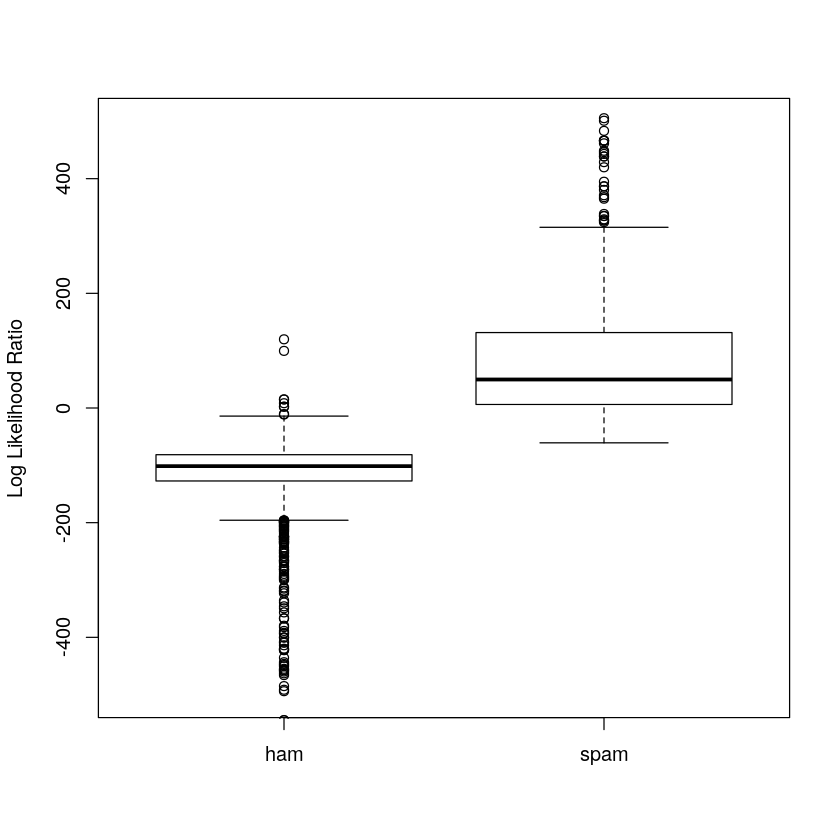

In [17]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_LLR_Boxplot.jpeg", sep="")))
invisible(dev.off ())


In [18]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

[1] 0.003452741

[1] 0.005610703

In [21]:
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

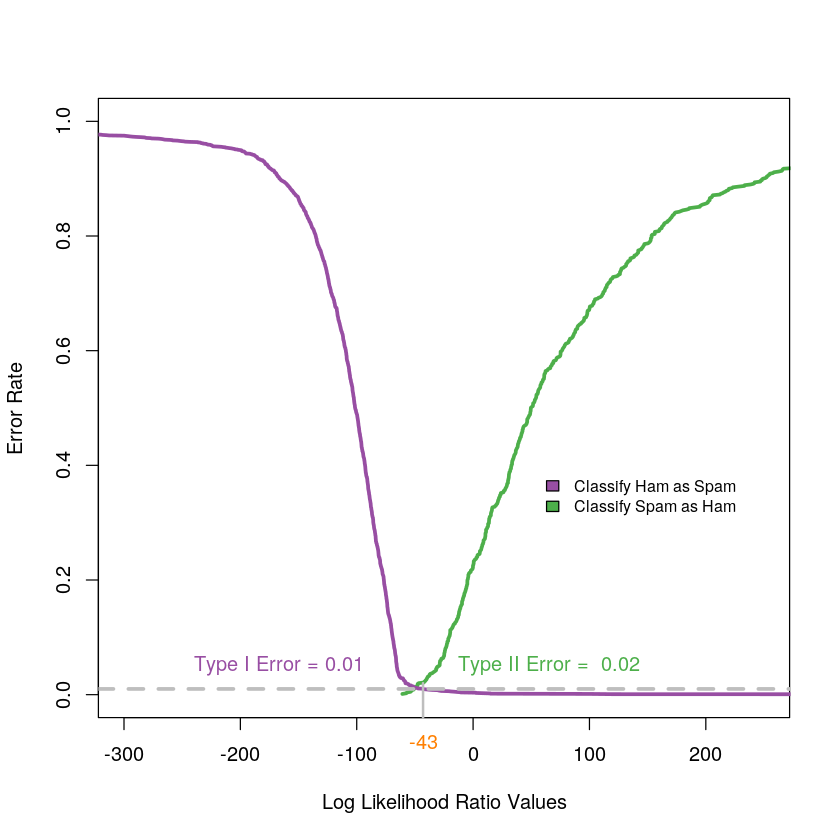

In [22]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_LLR_LinePlotTypeI+IIErrors.jpeg", sep="")))
invisible(dev.off ())

#dev.off()

In [23]:
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

In [24]:
largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

[1] 1.8189894035458564758e-06
[1] 10000.000001818989404
[1] 10000


[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                      
 [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                          
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                       
 [4] "Received: from localhost (localhost [127.0.0.1])"                                                  
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                     
 [7] "Received: from phobos [127.0.0.1]"                                                                 
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                        
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                         
[10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                            
[12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

In [25]:
headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


[[1]]
[1] "zzzz@localhost.netnoteinc.com"              
[2] "exmh-workers@listman.spamassassin.taint.org"

Delivered-To 
              "zzzz@localhost.netnoteinc.com" 
                                 Delivered-To 
"exmh-workers@listman.spamassassin.taint.org"

[1] 36

[1] 26

In [26]:
headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

[1] "text/plain; charset=us-ascii"                                                                                   
 [2] "text/plain; charset=US-ASCII"                                                                                   
 [3] "text/plain; charset=US-ASCII"                                                                                   
 [4] "text/plain; charset=\"us-ascii\""                                                                               
 [5] "text/plain; charset=US-ASCII"                                                                                   
 [6] "multipart/signed;\nboundary=\"==_Exmh_-1317289252P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""
 [7] NA                                                                                                               
 [8] "multipart/alternative;\nboundary=\"----=_NextPart_000_00C1_01C25017.F2F04E20\""                                 
 [9] "multipart/alternative; boundary=Apple-Mail-2-874629474"                                                         
[10] "multipart/signed;\nboundary=\"==_Exmh_-518574644P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[11] "multipart/related;\nboundary=\"------------090602010909000705010009\""                                          
[12] "multipart/signed;\nboundary=\"==_Exmh_-451422450P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[13] "multipart/signed;\nboundary=\"==_Exmh_267413022P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""  
[14] "multipart/mixed;\nboundary=\"----=_NextPart_000_0005_01C26412.7545C1D0\""                                       
[15] "multipart/alternative;\nboundary=\"------------080209060700030309080805\""

[1]  6  8  9 10 11 12 13 14 15

[1] "==_Exmh_-1317289252P"                     
[2] "----=_NextPart_000_00C1_01C25017.F2F04E20"
[3] "Apple-Mail-2-874629474"                   
[4] "==_Exmh_-518574644P"                      
[5] "------------090602010909000705010009"     
[6] "==_Exmh_-451422450P"                      
[7] "==_Exmh_267413022P"                       
[8] "----=_NextPart_000_0005_01C26412.7545C1D0"
[9] "------------080209060700030309080805"

[1]  2 35

[1] 77

[1] 42

In [27]:
### This code has mistakes in it - and we fix them later!
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}


In [28]:
bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

lens = sapply(attList, function(processedA) 
                           processedA$attachDF$aLen)
head(lens)  # will cause an error with the first message. its ok.
attList[[2]]$attachDF

body = bodyList[hasAttach][[2]]
length(body)

body[35:45]

Warning message in grep(bString, body):
“input string 41 is invalid in this locale”Warning message in grep(bString, body):
“input string 43 is invalid in this locale”Warning message in grep(bString, body):
“input string 51 is invalid in this locale”Warning message in grep(eString, body):
“input string 41 is invalid in this locale”Warning message in grep(eString, body):
“input string 43 is invalid in this locale”Warning message in grep(eString, body):
“input string 51 is invalid in this locale”

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 12

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 44 44

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 83

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 12

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
NULL

$`/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssass

aLen,aType
44,text/html
44,<META http-equiv=3DContent-Type content=3Dtext/html; =


[1] 86

[1] ""                                                                
 [2] "------=_NextPart_000_00C1_01C25017.F2F04E20"                     
 [3] "Content-Type: text/html;"                                        
 [4] "\tcharset=\"Windows-1252\""                                      
 [5] "Content-Transfer-Encoding: quoted-printable"                     
 [6] ""                                                                
 [7] "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0 Transitional//EN\">"
 [8] "<HTML><HEAD>"                                                    
 [9] "<META http-equiv=3DContent-Type content=3D\"text/html; ="        
[10] "charset=3Dwindows-1252\">"                                       
[11] "<META content=3D\"MSHTML 6.00.2716.2200\" name=3DGENERATOR>"

In [29]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



In [30]:
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [31]:
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'”

[1] FALSE

[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [32]:
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


In [33]:
sapply(sampleStruct, perCaps)

funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham1 
                                                                                                                          4.451039 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham2 
                                                                                                                          7.491289 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham3 
                                                                                                                          7.436096 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham4 
                                                                                                                          5.090909 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham5 
                                                                                                                          6.116643 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham15 
                                                                                                                          7.732865 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham27 
                                                                                                                          5.523256 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham68 
                                                                                                                         10.059172 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham69 
                                                                                                                         10.885806 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham329 
                                                                                                                          6.472492 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham404 
                                                                                                                          9.597258 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham427 
                                                                                                                         11.970075 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham516 
                                                                                                                          9.233792 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham852 
                                                                                                                          1.655629 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham971 
                                                                                                                          6.417910

In [34]:
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

$isRe
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham1 
                                                                                                                              TRUE 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham2 
                                                                                                                             FALSE 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham3 
                                                                                                                             FALSE 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham4 
                                                                                                                             FALSE 
  /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham5 
                                                                                                                              TRUE 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham15 
                                                                                                                              TRUE 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham27 
                                                                                                                              TRUE 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham68 
                                                                                                                             FALSE 
 /media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham69 
                                                                                                                              TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham329 
                                                                                                                              TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham404 
                                                                                                                              TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham427 
                                                                                                                              TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham516 
                                                                                                                              TRUE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham852 
                                                                                                                             FALSE 
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham971 
                                                                                                                              TRUE 

$numLines
  /media/hkns/Acer/User

,isRe,numLines,isYelling,perCaps
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham1,TRUE,50,FALSE,4.451039
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham2,FALSE,26,FALSE,7.491289
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham3,FALSE,38,FALSE,7.436096
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham4,FALSE,32,FALSE,5.090909
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham5,TRUE,31,FALSE,6.116643
/media/hkns/Acer/Users/Neetu Hari/Desktop/SMU/MSDS 7333 - Quantifying the World/Unit 10 as unit 6/SpamAssassinMessages/easy_ham15,TRUE,54,FALSE,7.732865


In [37]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



In [38]:
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

emailDF = createDerivedDF(emailStruct)
dim(emailDF)
#save(emailDF, file = "spamAssassinDerivedDF.rda")

[1] 9348   30

In [41]:
str(emailDF)

'data.frame':	9348 obs. of  30 variables:
 $ isSpam       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ isRe         : logi  TRUE FALSE FALSE FALSE TRUE TRUE ...
 $ numLines     : int  50 26 38 32 31 25 38 39 126 50 ...
 $ bodyCharCt   : int  1554 873 1713 1095 1021 718 1288 1182 5989 1554 ...
 $ underscore   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ subExcCt     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ subQuesCt    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ numAtt       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ priority     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ numRec       : int  2 1 1 0 1 1 1 1 1 2 ...
 $ perCaps      : num  4.45 7.49 7.44 5.09 6.12 ...
 $ isInReplyTo  : logi  TRUE FALSE FALSE FALSE FALSE TRUE ...
 $ sortedRec    : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ subPunc      : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ hour         : num  11 11 12 13 13 13 13 14 14 11 ...
 $ multipartText: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ hasImages    : logi  FAL

In [42]:
print(summary(emailDF))

   isSpam           isRe            numLines         bodyCharCt    
 Mode :logical   Mode :logical   Min.   :   2.00   Min.   :    27  
 FALSE:6951      FALSE:6343      1st Qu.:  19.00   1st Qu.:   587  
 TRUE :2397      TRUE :3005      Median :  32.00   Median :  1088  
                                 Mean   :  66.91   Mean   :  2844  
                                 3rd Qu.:  59.00   3rd Qu.:  2192  
                                 Max.   :6319.00   Max.   :188505  
                                                                   
 underscore         subExcCt         subQuesCt           numAtt        
 Mode :logical   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.00000  
 FALSE:9222      1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.00000  
 TRUE :126       Median : 0.0000   Median : 0.0000   Median : 0.00000  
                 Mean   : 0.1313   Mean   : 0.1378   Mean   : 0.06579  
                 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.00000  
                 Max.   

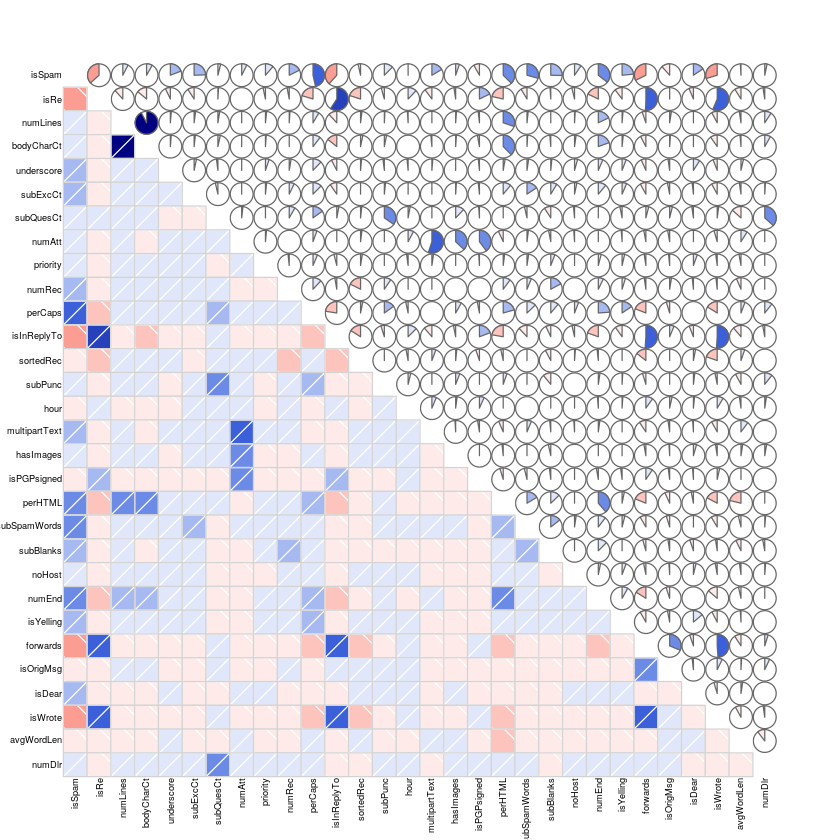

In [85]:
library(corrgram)
labs=colnames(emailDF)
corrgram(as.matrix(emailDF), order=FALSE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=NULL, #diag.panel=panel.density,
  # main="Correlation between variables of the dataframe created",
  outer.labels=list(bottom=list(labels=labs, cex=.7),left=list(labels=labs, cex=.7))) 
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"CorrelationPlt.jpeg", sep="")))
invisible(dev.off ())

In [67]:
library(Hmisc)
#mtcars is a data frame
rcorr(as.matrix(emailDF))

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:plyr’:

    is.discrete, summarize

The following object is masked from ‘package:e1071’:

    impute

The following objects are masked from ‘package:base’:

    format.pval, units



              isSpam  isRe numLines bodyCharCt underscore subExcCt subQuesCt
isSpam          1.00 -0.37     0.08       0.08       0.19     0.24      0.04
isRe           -0.37  1.00    -0.12      -0.14      -0.07    -0.09      0.01
numLines        0.08 -0.12     1.00       0.92       0.01     0.02      0.03
bodyCharCt      0.08 -0.14     0.92       1.00       0.01     0.02      0.03
underscore      0.19 -0.07     0.01       0.01       1.00     0.03     -0.02
subExcCt        0.24 -0.09     0.02       0.02       0.03     1.00     -0.04
subQuesCt       0.04  0.01     0.03       0.03      -0.02    -0.04      1.00
numAtt          0.07  0.00     0.01      -0.01       0.01     0.00      0.02
priority        0.11 -0.03     0.02       0.01       0.05     0.02     -0.01
numRec          0.18 -0.03     0.01       0.00       0.03     0.07      0.08
perCaps         0.46 -0.20     0.09       0.11       0.12     0.12      0.15
isInReplyTo    -0.38  0.59    -0.12      -0.14      -0.08    -0.10      0.03

In [44]:
#load("Data/spamAssassinDerivedDF.rda")
dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


[1] 9348   30

In [45]:
pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)


x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

[1] TRUE

Warning message in indNA == indNoSubject:
“longer object length is not a multiple of shorter object length”

[1] FALSE

[1] TRUE

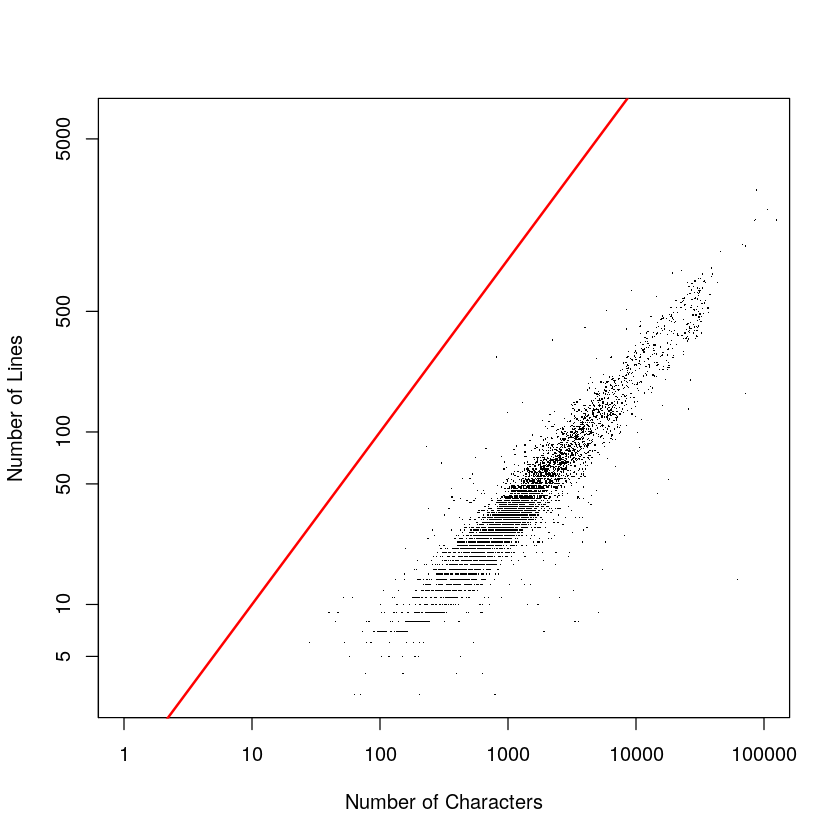

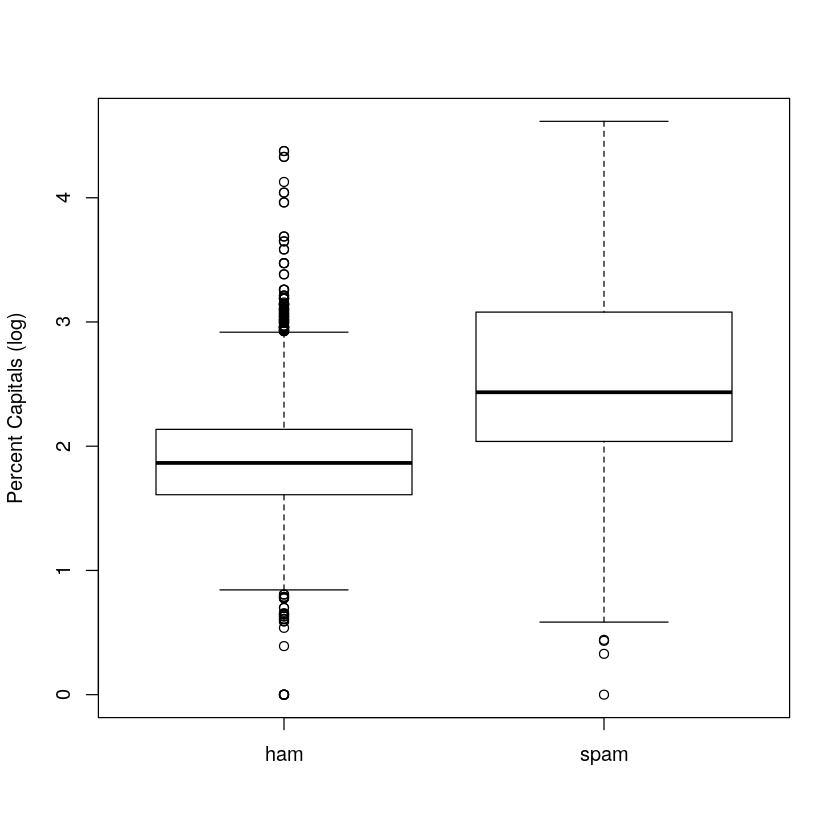

In [46]:
#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_ScatterPlotNumLinesNumChars.jpeg", sep="")))
invisible(dev.off ())

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_boxplotsPercentCaps.jpeg", sep="")))
invisible(dev.off ())
#dev.off()

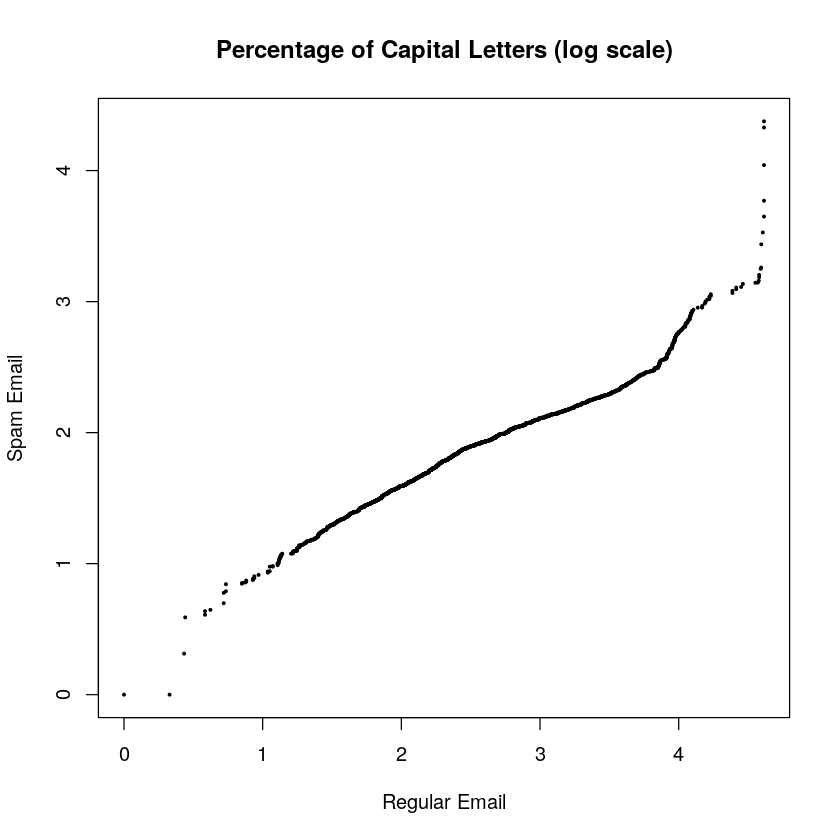

In [47]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_qqplotPercentCapsTotChars.jpeg", sep="")))
invisible(dev.off ())

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

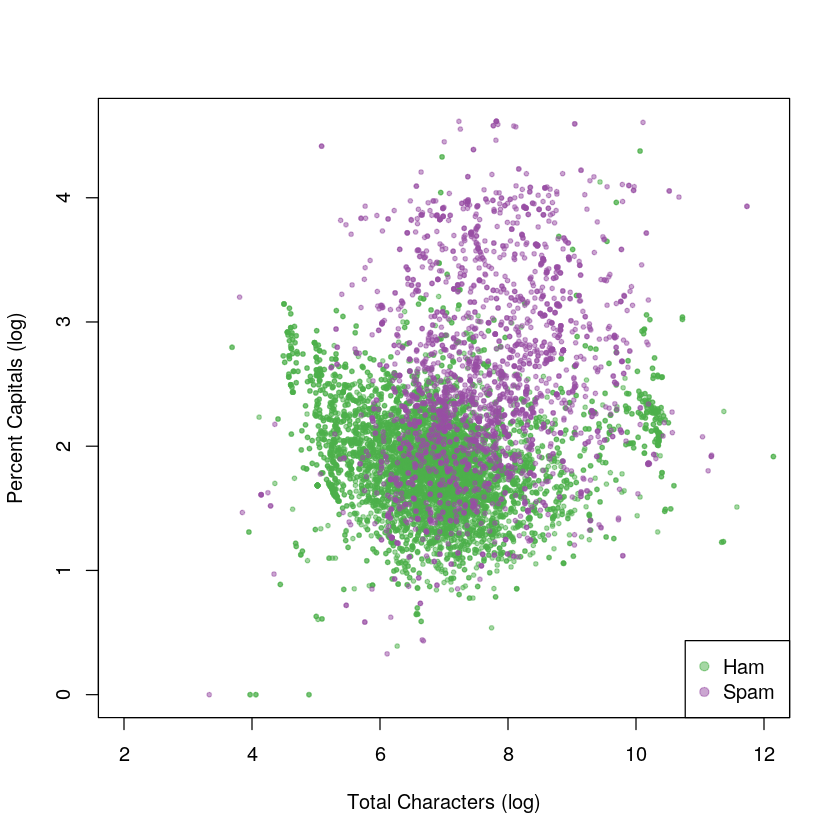

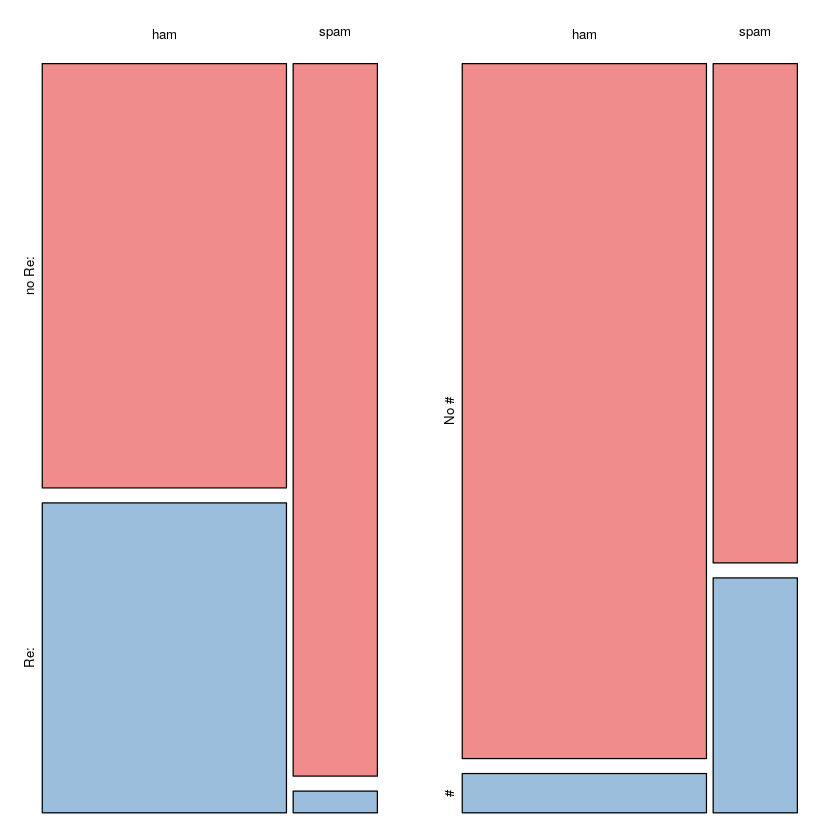

In [90]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)
legend("bottomright", legend=c("Ham", "Spam"),
       col=colI,  pch = 19)

invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_scatterplotPercentCapsTotChars.jpeg", sep="")))
invisible(dev.off ())

#dev.off()

table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_mosaicPlot.jpeg", sep="")))
invisible(dev.off ())

#dev.off()

library(rpart)

setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

In [49]:
set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")


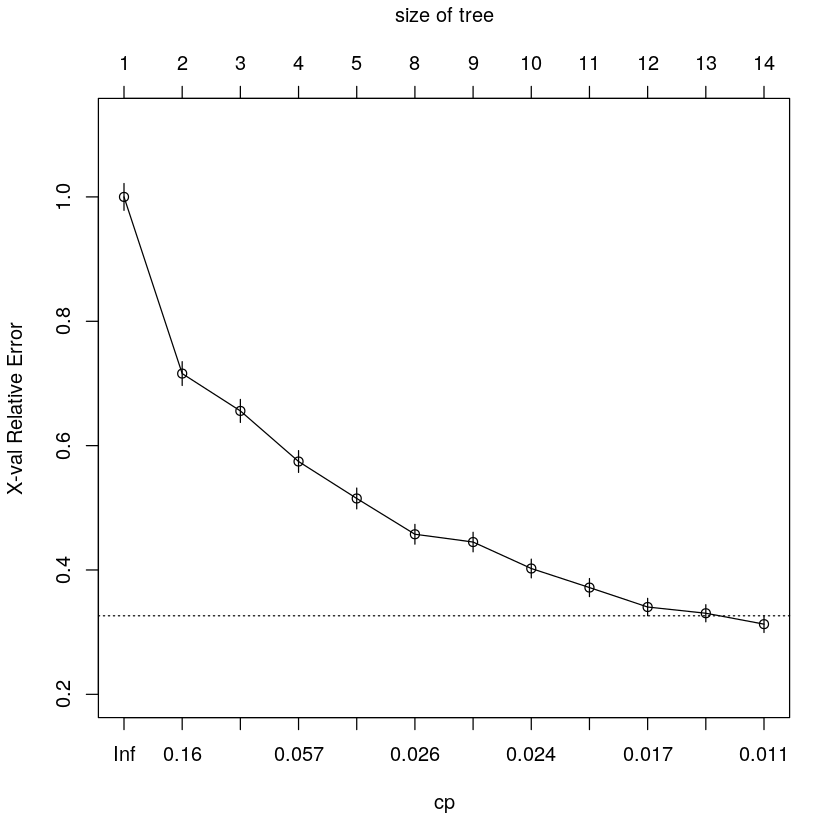

In [117]:
rpart::(rpartFit)

F    T 
2192  125

[1] 0.05394907

[1] 0.1564456

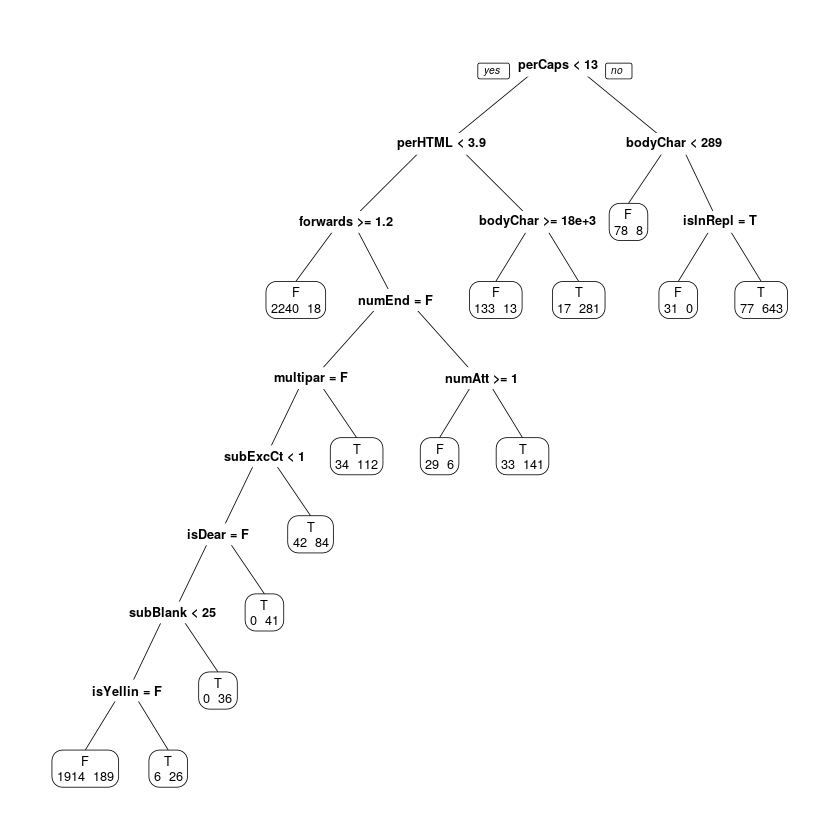

In [50]:
library(rpart.plot)

prp(rpartFit, extra = 1)

library(rpart.plot)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_rpartTree.jpeg", sep="")))
invisible(dev.off ())

In [51]:
fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })


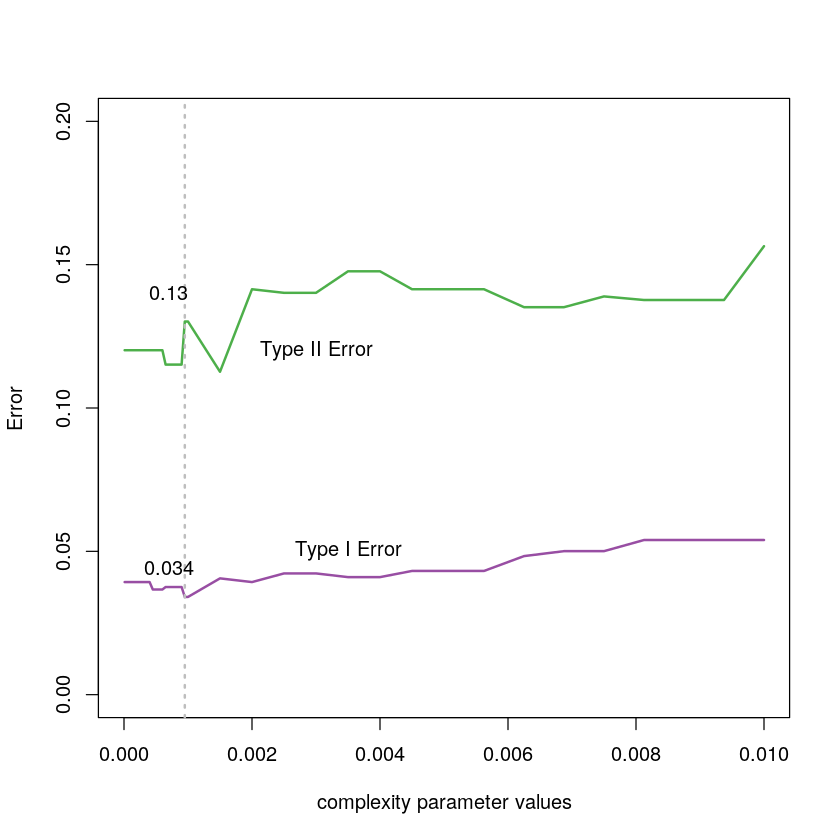

In [52]:

#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"SPAM_rpartTypeIandII.jpeg", sep="")))
invisible(dev.off ())
#dev.off()

In [53]:
save(emailDFrp,file="data.Rda")

In [54]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



## Ok so first of all our data is in T/F 'factors'.  
We need to change it to numbers.  And as it turns out, there are quite a few NANs as well.  Let's set those to zero because imputation was 9 weeks ago

In [55]:
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

## I think i may skip this and see if I can get the folds to work internally to caret
However, one way to define your folds is to set a seed, and have your folds in a list that you can pass on to others to get the same splits.

In [56]:
cv_folds <- createFolds(emailDFnum$isSpam, k=5, list=TRUE, returnTrain = TRUE)
lengths(cv_folds)

Fold1 Fold2 Fold3 Fold4 Fold5 
 7478  7478  7479  7479  7478

### Function to plot confusion matrix

In [289]:
draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Ham', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Spam', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Ham', cex=1.2, srt=90)
  text(140, 335, 'Spam', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

## Finally Metric Stuff
Because our authors prefer Type I/II errors, but the cool kids know that precision/recall/F1 is where its at, while the default of caret is accuracy and kappa.  To get us all on the same page, I create a function that returns the metrics we want.  However, rather than re-invent the wheel, I just install a package.  I am not sure if it had Type I/II errors so those I made my self.  \#MLSwag

In [290]:
install.packages('MLmetrics')
install.packages('naivebayes')
install.packages('e1071')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [291]:
library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
  fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=fp,
    Type_II_err=fn
   )
}

ok so lets get the naive bayes packages installed. (first 2 lines)
The next line makes a dataframe of all the parameters to check.  
If you don't know what they are, look them up
https://topepo.github.io/caret/available-models.html

Then we create a trainControl object.  It tells caret how to train--using a cross-validation ('cv') with 3 folds in this case (number = 3).  We want the final predictions of the best model and our summary is the custom function from above.

Then we create our model: "model_nb".  We user the caret::train method.  We make 'isSpam' a factor because R is dumb and can't figure out that 1 and 0 are classes.  
*as.factor(isSpam) ~ .*  means Y=as.factor(isSpam), X=everything else.
    
*method* is the package we are using, and we pass our tuning grid.

In [292]:
# Split data into test and train
library(caret)
train.index <- createDataPartition(emailDFnum$isSpam, p = .8, list = FALSE)
train_df <- emailDFnum[ train.index,]
test_df  <- emailDFnum[-train.index,]
cat("Dimension of entire dataset:", dim(emailDFnum))
cat("\nDimension of train Data:", dim(train_df))
cat("\nDimension of test Data:", dim(test_df))

Dimension of entire dataset: 9348 30
Dimension of train Data: 7479 30
Dimension of test Data: 1869 30

In [293]:
y_test_actual <- test_df$isSpam
test_df <- test_df[,-isSpam]
cat("Dimension of test Data without isSpam column:", dim(test_df))

Dimension of test Data without isSpam column: 1869 29

### naivebayes hyperparameter tunning

In [294]:
library(naivebayes)
library(e1071)
nb_grid<-expand.grid(fL=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=train_df, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Naive Bayes 

7479 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 4985, 4987, 4986 
Resampling results across tuning parameters:

  fL   usekernel  adjust  F1         prec       rec        Type_I_err
  0.0  FALSE      FALSE   0.9071655  0.9489020  0.8715356  0.03570211
  0.0  FALSE       TRUE   0.9071655  0.9489020  0.8715356  0.03570211
  0.0   TRUE      FALSE   0.8831558  0.7916942  0.9985628  0.19561714
  0.0   TRUE       TRUE   0.8831558  0.7916942  0.9985628  0.19561714
  0.1  FALSE      FALSE   0.9071655  0.9489020  0.8715356  0.03570211
  0.1  FALSE       TRUE   0.9071655  0.9489020  0.8715356  0.03570211
  0.1   TRUE      FALSE   0.8831558  0.7916942  0.9985628  0.19561714
  0.1   TRUE       TRUE   0.8831558  0.7916942  0.9985628  0.19561714
  0.3  FALSE      FALSE   0.9071655  0.9489020  0.8715356  0.03570211
  0.3  FALSE       TRUE   0.9071655  0.9489020  0.8715356  0.03570211
  0.3   TRUE      

In [295]:
#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample'])


Fold1 Fold2 Fold3 
 2494  2492  2493 

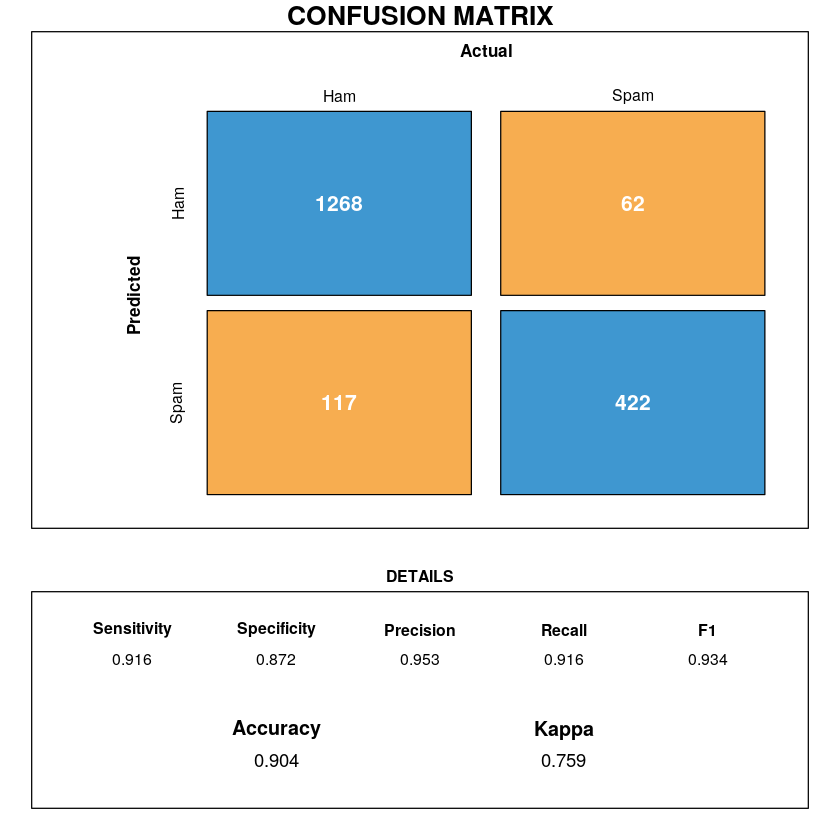

In [296]:
y_test_prediction <- predict(model_nb$finalModel, test_df)
# calculate the confusion matrix
cm <- confusionMatrix(data = y_test_prediction, reference = y_test_actual)
draw_confusion_matrix(cm)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"cm_nb.jpeg", sep="")))
invisible(dev.off ())

### rpart hyperparameter tunning

In [297]:
val<-seq(from = 0, to=0.01, by=0.0005)
library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=train_df, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

CART 

7479 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 5984, 5983, 5983, 5982, 5984 
Resampling results across tuning parameters:

  cp      F1         prec       rec        Type_I_err  Type_II_err
  0.0000  0.9581282  0.9544560  0.9619096  0.03422702  0.02834708 
  0.0005  0.9579847  0.9534680  0.9626281  0.03502916  0.02781241 
  0.0010  0.9592181  0.9551964  0.9633472  0.03369208  0.02727720 
  0.0015  0.9582459  0.9537968  0.9628081  0.03476214  0.02767818 
  0.0020  0.9570980  0.9524593  0.9619094  0.03583130  0.02834788 
  0.0025  0.9563621  0.9557227  0.9570578  0.03302435  0.03195805 
  0.0030  0.9547217  0.9524146  0.9572363  0.03569779  0.03182453 
  0.0035  0.9536829  0.9488982  0.9586738  0.03850617  0.03075475 
  0.0040  0.9525743  0.9503571  0.9550799  0.03730198  0.03343042 
  0.0045  0.9520896  0.9524384  0.9520253  0.03556285  0.03570449 
  0.0050  0.9520379  0.9533671  0.9509476  0.0

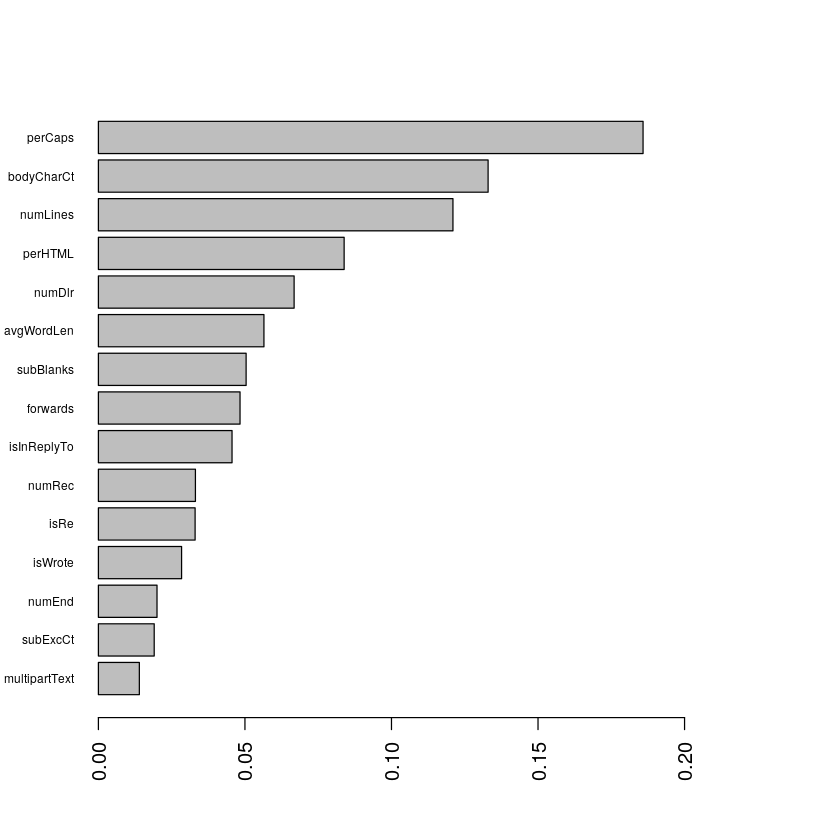

In [298]:
imp <- model_rpart$finalModel$variable.importance
imp <- sort(sort(unlist(imp/sum(imp)), decreasing = TRUE)[1:15])
barplot(imp, horiz=TRUE, las=2, xlim=c(0,0.05+max(imp)), cex.names =0.6)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"featureImp_rpart.jpeg", sep="")))
invisible(dev.off ())

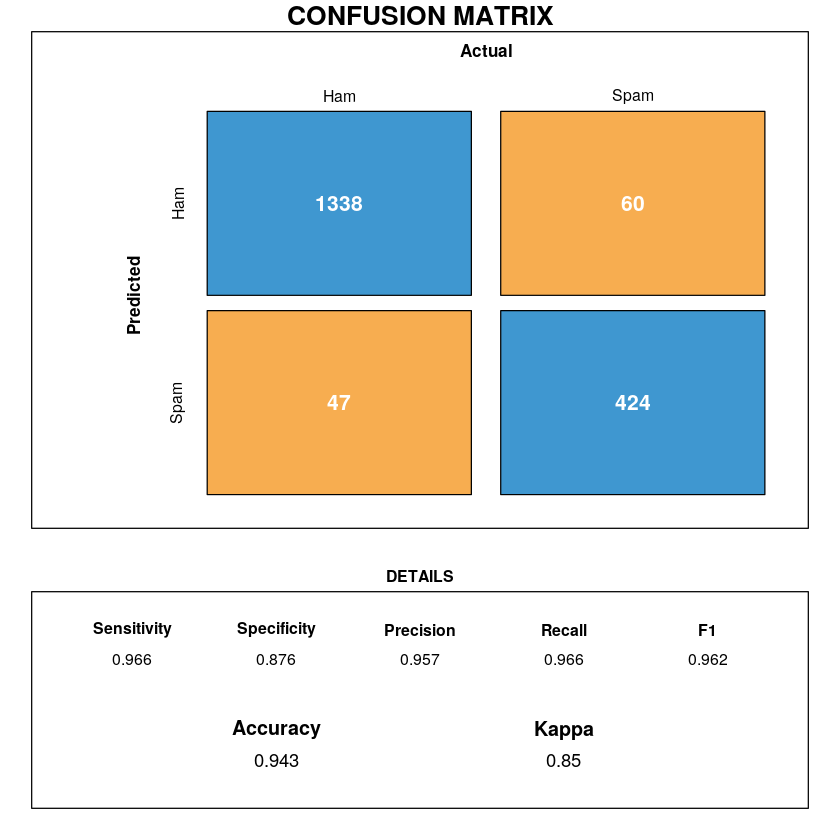

In [299]:
y_test_prediction <- as.integer(predict(model_rpart$finalModel, test_df, type = c("vector"))) - 1
# calculate the confusion matrix
cm <- confusionMatrix(data = y_test_prediction, reference = y_test_actual)
draw_confusion_matrix(cm)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"cm_rpart.jpeg", sep="")))
invisible(dev.off ())

### Randomforest HyperParameter tunning

In [300]:
library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=train_df, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Random Forest 

7479 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 4987, 4985, 4986 
Resampling results across tuning parameters:

  mtry  F1         prec       rec        Type_I_err  Type_II_err
   1    0.9151993  0.8472130  0.9951486  0.13370569  0.003610591
   3    0.9758378  0.9653888  0.9865248  0.02634192  0.010028562
   5    0.9810733  0.9751658  0.9870637  0.01872021  0.009627171
   7    0.9806068  0.9756483  0.9856265  0.01831898  0.010696779
   9    0.9801628  0.9749419  0.9854468  0.01885338  0.010830540
  11    0.9792555  0.9745602  0.9840094  0.01912069  0.011900095
  13    0.9795375  0.9742340  0.9849078  0.01938810  0.011231556
  15    0.9775635  0.9726141  0.9825720  0.02059142  0.012970025
  17    0.9796075  0.9752530  0.9840093  0.01858586  0.011900363
  19    0.9781797  0.9736560  0.9827517  0.01978901  0.012836210
  21    0.9784365  0.9743468  0.9825720  0.01925429  0.012969918
  23  

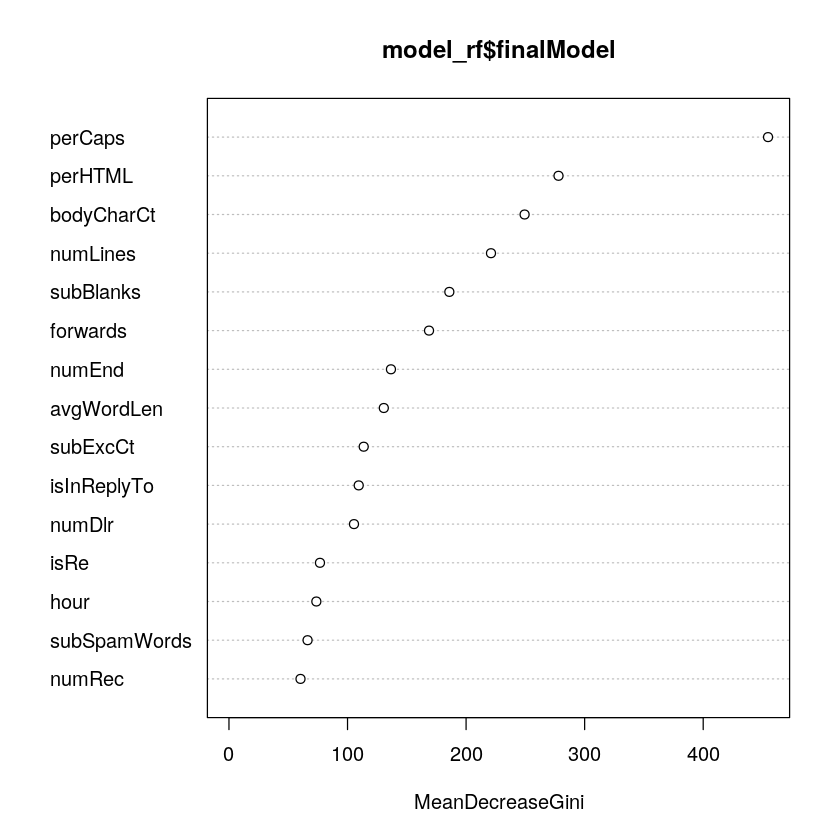

In [301]:
varImpPlot(model_rf$finalModel, sort=TRUE, n.var = 15)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"featureImp_rf.jpeg", sep="")))
invisible(dev.off ())

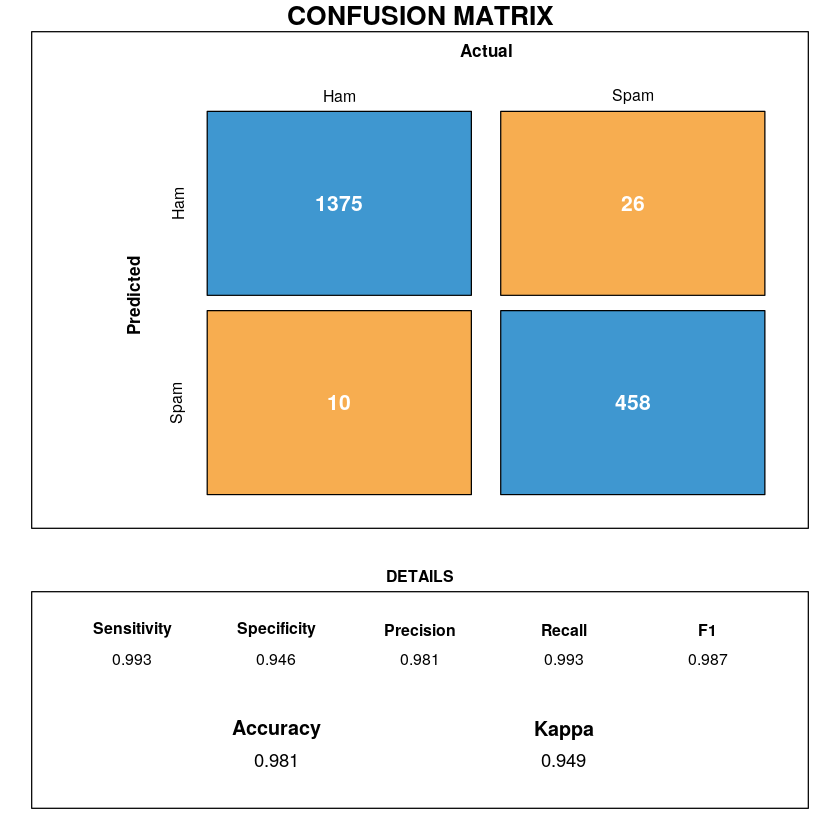

In [302]:
y_test_prediction <- predict(model_rf$finalModel, test_df)
# calculate the confusion matrix
cm <- confusionMatrix(data = y_test_prediction, reference = y_test_actual)
draw_confusion_matrix(cm)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"cm_rf.jpeg", sep="")))
invisible(dev.off ())

### xgboost hyperparameter tunning

In [303]:
library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=train_df, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

eXtreme Gradient Boosting 

7479 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 4986, 4986, 4986 
Resampling results across tuning parameters:

  eta   max_depth  gamma  F1         prec       rec        Type_I_err
  0.01   3          1     0.9283970  0.8861245  0.9750259  0.09332799
  0.01   3          3     0.9281577  0.8856893  0.9750259  0.09372911
  0.01   3          5     0.9286483  0.8864407  0.9752054  0.09306057
  0.01   3         10     0.9283286  0.8858502  0.9752054  0.09359540
  0.01   5          1     0.9486707  0.9240428  0.9746670  0.05963364
  0.01   5          3     0.9485788  0.9240388  0.9744874  0.05963364
  0.01   5          5     0.9480798  0.9230908  0.9744873  0.06043589
  0.01   5         10     0.9474700  0.9224195  0.9739483  0.06097072
  0.01   7          1     0.9544768  0.9359342  0.9737701  0.04960556
  0.01   7          3     0.9547271  0.9364170  0.9737703  0.04920444
  0.

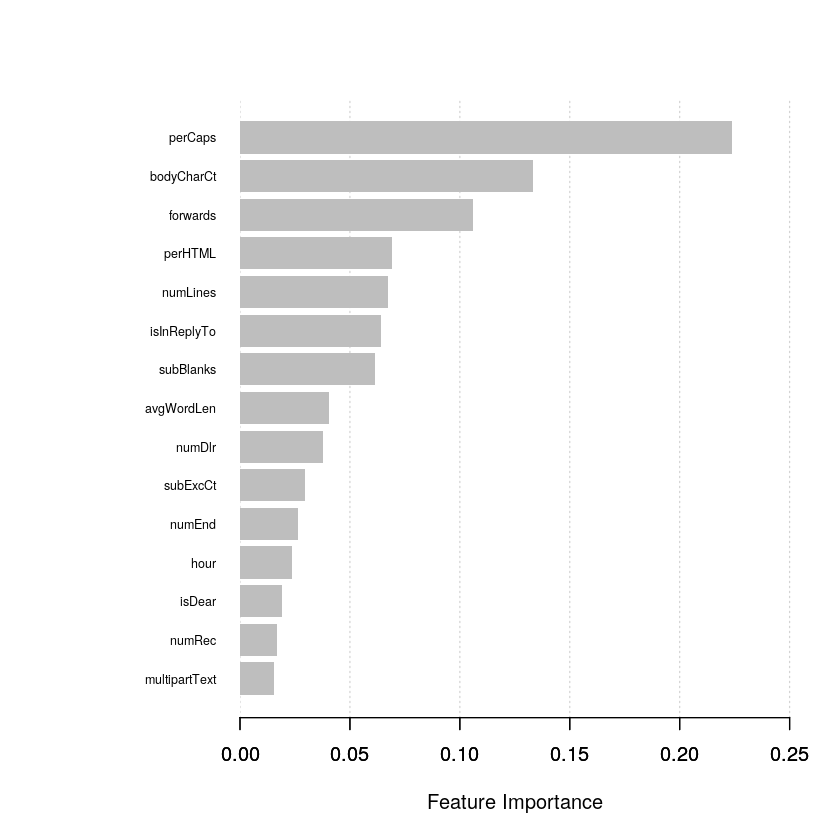

In [304]:
xgb.plot.importance(xgb.importance(model=model_xgb$finalModel), top_n = 15, xlim = c(0, 0.25),
                    xlab = "Feature Importance")
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"featureImp_xgb.jpeg", sep="")))
invisible(dev.off ())

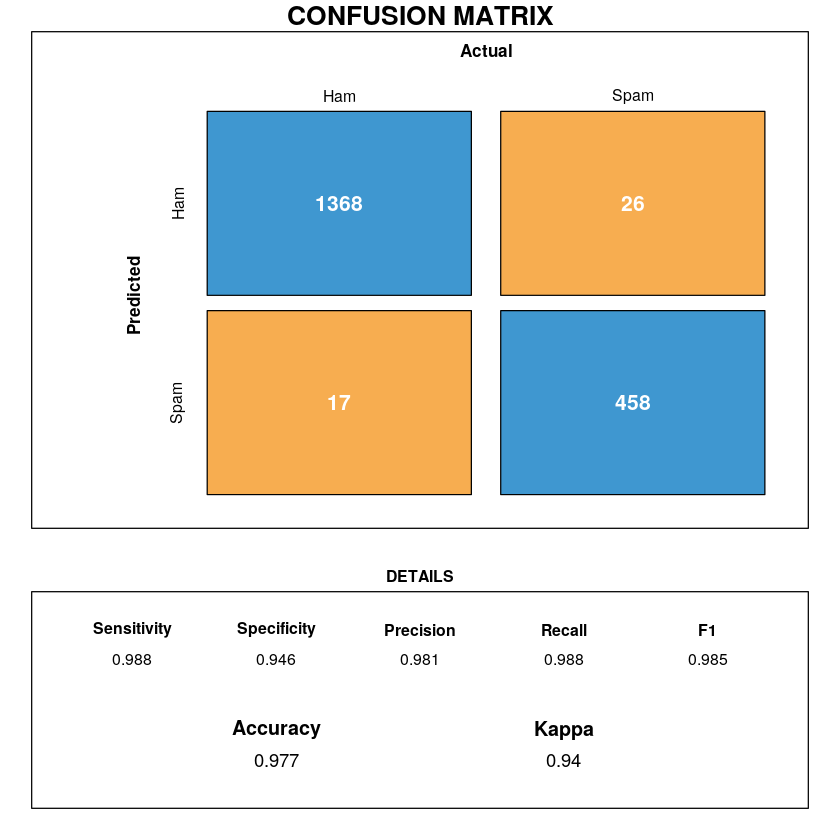

In [305]:
y_test_prediction <- as.numeric(predict(model_xgb$finalModel, as.matrix(test_df), type=c("vector"))<0.5)
# calculate the confusion matrix
cm <- confusionMatrix(data = y_test_prediction, reference = y_test_actual)
draw_confusion_matrix(cm)
invisible(dev.copy(jpeg,filename=paste(initialPath, .Platform$file.sep,"cm_xgb.jpeg", sep="")))
invisible(dev.off ())

In [59]:
dim(emailDFnum)
library(caret)
train.index <- createDataPartition(emailDFnum$isSpam, p = .8, list = FALSE)
train_df <- emailDFnum[ train.index,]
test_df  <- emailDFnum[-train.index,]

[1] 9348   30

In [60]:
library(naivebayes)
library(e1071)
nb_grid<-expand.grid(fL=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  fL   usekernel  adjust  F1         prec       rec        Type_I_err
  0.0  FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.0449294 
  0.0  FALSE       TRUE   0.9120243  0.9379435  0.8899439  0.0449294 
  0.0   TRUE      FALSE   0.8920568  0.8071581  0.9974104  0.1780060 
  0.0   TRUE       TRUE   0.8920568  0.8071581  0.9974104  0.1780060 
  0.1  FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.0449294 
  0.1  FALSE       TRUE   0.9120243  0.9379435  0.8899439  0.0449294 
  0.1   TRUE      FALSE   0.8920568  0.8071581  0.9974104  0.1780060 
  0.1   TRUE       TRUE   0.8920568  0.8071581  0.9974104  0.1780060 
  0.3  FALSE      FALSE   0.9120243  0.9379435  0.8899439  0.0449294 
  0.3  FALSE       TRUE   0.9120243  0.9379435  0.8899439  0.0449294 
  0.3   TRUE      

In [185]:
varImp(model_nb$finalModel)

ERROR: Error in UseMethod("varImp"): no applicable method for 'varImp' applied to an object of class "naive_bayes"


In [188]:
naiveBayes()

ERROR: Error in as.data.frame(x): argument "x" is missing, with no default


In [61]:
#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample'])


Fold1 Fold2 Fold3 
 3116  3116  3116 

In [62]:
val<-seq(from = 0, to=0.01, by=0.0005)
library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7478, 7478, 7479, 7479 
Resampling results across tuning parameters:

  cp      F1         prec       rec        Type_I_err  Type_II_err
  0.0000  0.9577277  0.9556068  0.9598613  0.03316212  0.02984604 
  0.0005  0.9586535  0.9551824  0.9621631  0.03359033  0.02813429 
  0.0010  0.9607852  0.9575735  0.9640339  0.03177169  0.02674323 
  0.0015  0.9593061  0.9570400  0.9615882  0.03209243  0.02856181 
  0.0020  0.9579437  0.9589294  0.9569848  0.03048826  0.03198456 
  0.0025  0.9573013  0.9550609  0.9595744  0.03359067  0.03005931 
  0.0030  0.9568278  0.9541410  0.9595750  0.03433962  0.03005926 
  0.0035  0.9554217  0.9536163  0.9572728  0.03466053  0.03177111 
  0.0040  0.9541856  0.9541551  0.9542519  0.03412577  0.03401750 
  0.0045  0.9530868  0.9533892  0.9528134  0.03466059  0.03508702 
  0.0050  0.9514591  0.9524395  0.9505113  0.0

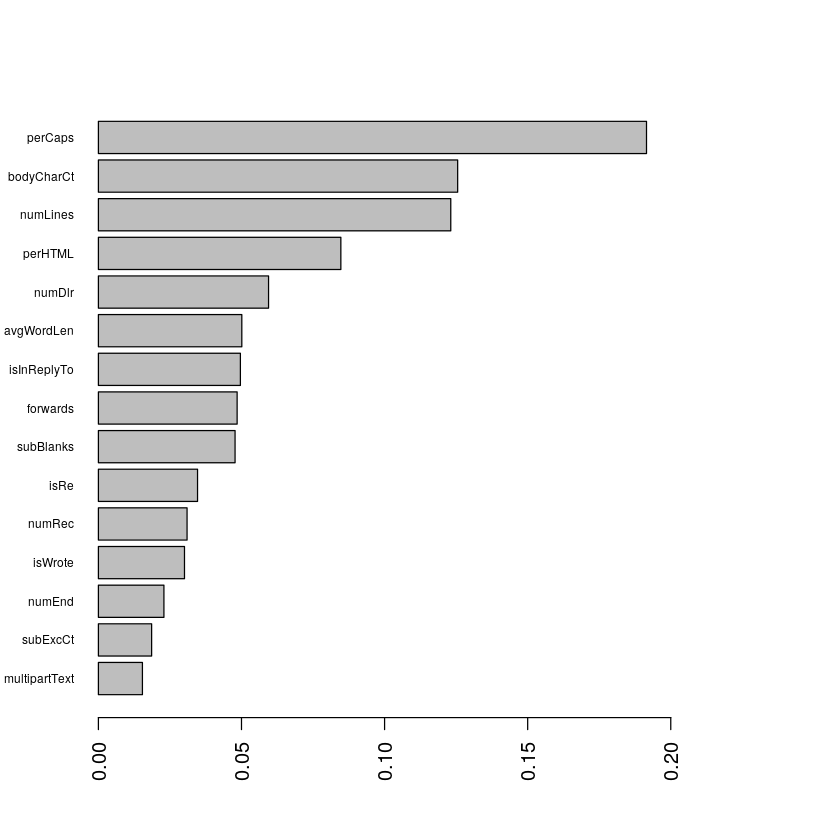

In [169]:
imp <- model_rpart$finalModel$variable.importance
imp <- sort(sort(unlist(imp/sum(imp)), decreasing = TRUE)[1:15])
barplot(imp, horiz=TRUE, las=2, xlim=c(0,0.05+max(imp)), cex.names =0.6)

In [63]:
library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

Random Forest 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  mtry  F1         prec       rec        Type_I_err  Type_II_err
   1    0.9133571  0.8432089  0.9962595  0.13778348  0.002781344
   3    0.9781170  0.9725585  0.9837433  0.02064613  0.012088147
   5    0.9837552  0.9789280  0.9886347  0.01583226  0.008451006
   7    0.9842226  0.9814116  0.9870522  0.01390672  0.009627728
   9    0.9845974  0.9807378  0.9884909  0.01444159  0.008557980
  11    0.9839394  0.9808471  0.9870522  0.01433462  0.009627728
  13    0.9841607  0.9807193  0.9876277  0.01444159  0.009199829
  15    0.9836586  0.9801468  0.9871961  0.01486949  0.009520753
  17    0.9838588  0.9812557  0.9864768  0.01401369  0.010055627
  19    0.9832925  0.9802734  0.9863329  0.01476252  0.010162602
  21    0.9830786  0.9799917  0.9861890  0.01497647  0.010269576
  23  

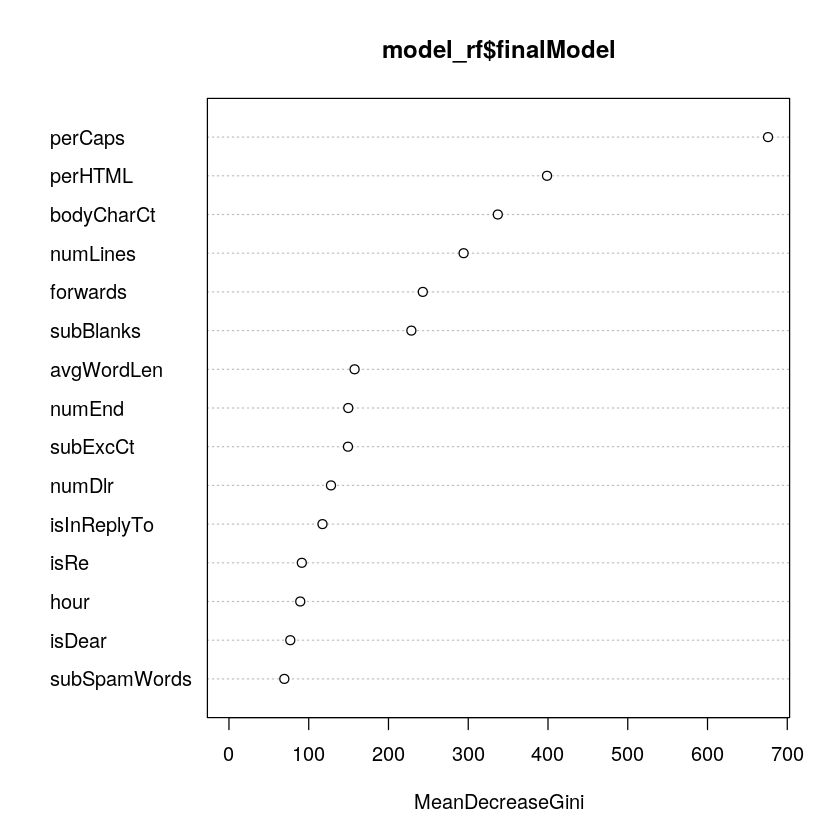

In [164]:
varImpPlot(model_rf$finalModel, sort=TRUE, n.var = 15)

In [64]:
library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. F1 will be used instead.”

eXtreme Gradient Boosting 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  eta   max_depth  gamma  F1         prec       rec        Type_I_err
  0.01   3          1     0.9324363  0.8918978  0.9768379  0.08804022
  0.01   3          3     0.9323907  0.8915738  0.9771256  0.08836115
  0.01   3          5     0.9323907  0.8915738  0.9771256  0.08836115
  0.01   3         10     0.9323721  0.8917794  0.9768379  0.08814720
  0.01   5          1     0.9492431  0.9244638  0.9753992  0.05926401
  0.01   5          3     0.9500404  0.9248095  0.9766940  0.05905006
  0.01   5          5     0.9498089  0.9248903  0.9761185  0.05894309
  0.01   5         10     0.9495993  0.9247491  0.9758308  0.05905006
  0.01   7          1     0.9589546  0.9436034  0.9748238  0.04332478
  0.01   7          3     0.9583385  0.9425517  0.9746799  0.04418057
  0.

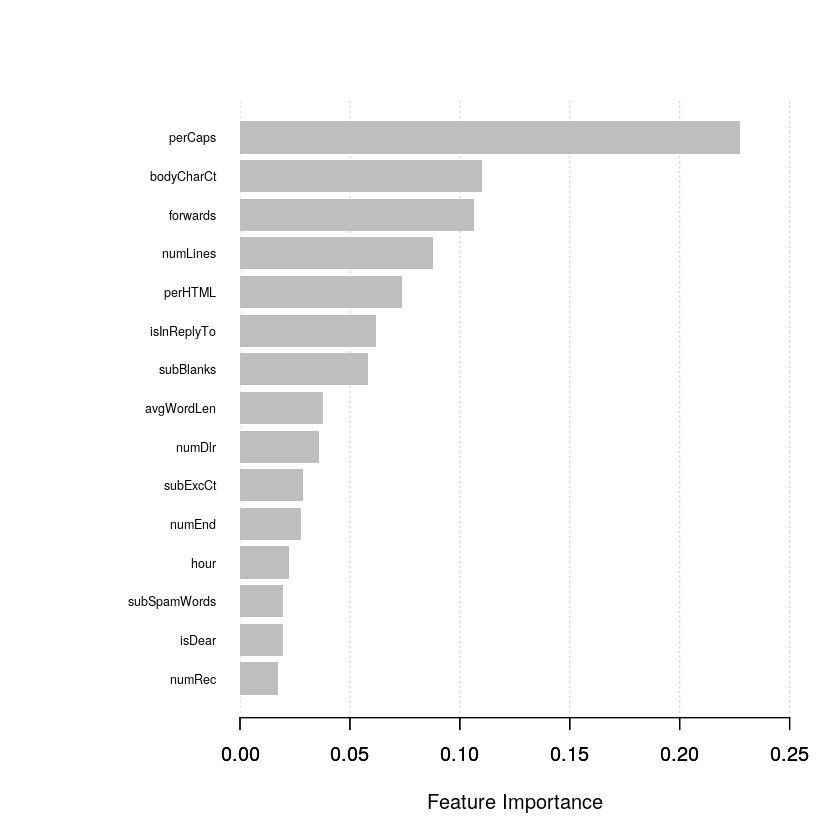

In [163]:
xgb.plot.importance(xgb.importance(model=model_xgb$finalModel), top_n = 15, xlim = c(0, 0.25),
                    xlab = "Feature Importance")